In [1]:
# Dependencies
import numpy as np
import pandas as pd


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from sqlalchemy import extract
from sqlalchemy.orm import sessionmaker

# Adding in Matplotlip dependencies.
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# Dig into tables.
inspector = inspect(engine)

print(inspector.get_table_names())

['measurement', 'station']


In [5]:
# Get column names from Measurement table.
print(inspector.get_columns('measurement'))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [6]:
# Get column names from Station table.
print(inspector.get_columns('station'))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [7]:
# Create June Temps DataFrame.
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
pd.set_option('display.max_rows', None)
june_df = pd.DataFrame(june_temps, columns=['date', 'tobs'])
june_df.rename(columns=({'tobs': 'June Temps'}), inplace=True)
june_df.sort_values(by='date')

,date,June Temps
0,2010-06-01,78.0
472,2010-06-01,73.0
658,2010-06-01,77.0
806,2010-06-01,69.0
844,2010-06-01,76.0
1076,2010-06-01,71.0
1312,2010-06-01,74.0
1477,2010-06-01,70.0
236,2010-06-01,74.0
1478,2010-06-02,78.0


In [8]:
# Create December Temps DataFrame.
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

dec_df = pd.DataFrame(dec_temps, columns=['date', 'tobs'])
dec_df.rename(columns=({'tobs': 'December Temps'}), inplace=True)
dec_df.sort_values(by='date')

,date,December Temps
0,2010-12-01,76.0
426,2010-12-01,73.0
604,2010-12-01,72.0
732,2010-12-01,78.0
942,2010-12-01,72.0
1159,2010-12-01,70.0
1311,2010-12-01,71.0
210,2010-12-01,73.0
713,2010-12-02,71.0
943,2010-12-02,71.0


In [9]:
# Compare the TEMPERATURE summary statistics between the 2 months - all years. 
june_sum = june_df.describe()
dec_sum = dec_df.describe()
compare_df = june_sum.merge(dec_sum, left_index=True, right_index=True)

compare_df

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [10]:
# Evaluate the Precipitation for June - all years. 
june_prec = (session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all())
juneprec_df = pd.DataFrame(june_prec, columns=['date', 'prcp'])
juneprec_df.rename(columns=({'prcp': 'June Precipitation'}), inplace=True)
juneprec_df

,date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
5,2010-06-06,0.00
6,2010-06-07,0.00
7,2010-06-08,0.00
8,2010-06-09,0.00
9,2010-06-10,0.00


In [11]:
# Evaluate the Precipitation for December - all years. 
dec_prec = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

decprec_df = pd.DataFrame(dec_prec, columns=['date', 'prcp'])
decprec_df.rename(columns=({'prcp': 'December Precipitation'}), inplace=True)
decprec_df

,date,December Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
5,2010-12-08,0.00
6,2010-12-09,0.00
7,2010-12-10,1.58
8,2010-12-11,0.77
9,2010-12-12,0.00


In [12]:
# Compare the PRECIPITATION summary statistics between the 2 months - all years. 
juneprec_sum = juneprec_df.describe()
decprec_sum = decprec_df.describe()
compareprec_df = juneprec_sum.merge(decprec_sum, left_index=True, right_index=True)

compareprec_df

,June Precipitation,December Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


In [13]:
# Confirm station data.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Review all of the stations' elevations.
session.query(Station.elevation, Station.station).group_by(Station.station).all()

[(0.9, 'USC00511918'),
 (14.6, 'USC00513117'),
 (7.0, 'USC00514830'),
 (152.4, 'USC00516128'),
 (11.9, 'USC00517948'),
 (306.6, 'USC00518838'),
 (32.9, 'USC00519281'),
 (3.0, 'USC00519397'),
 (19.5, 'USC00519523')]

In [15]:
# Count of all records for all stations in June - all years.
len(juneprec_df['June Precipitation'])

1700

In [16]:
# Count all the records that show ANY precipitation in June - all years.
len(juneprec_df[juneprec_df['June Precipitation'] > 0])

927

In [17]:
# Count all the records that show ANY precipitation in June - greater than 0.1 inch - all years.
len(juneprec_df[juneprec_df['June Precipitation'] > 0.1])

412

In [18]:
# Count of all records for all stations in December - all years.
len(decprec_df['December Precipitation'])

1517

In [19]:
# Count all the records that show ANY precipitation in December - all years.
len(decprec_df[decprec_df['December Precipitation'] > 0])

895

In [20]:
# Count all the records that show ANY precipitation in December - greater than 0.1 inch - all years.
len(decprec_df[decprec_df['December Precipitation'] > 0.1])

423

In [21]:
# Evaluate the Precipitation for June 2017 - most recent. 
june17_prec = (session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).\
               filter(extract('year', Measurement.date) == 2017).all())
juneprec17_df = pd.DataFrame(june17_prec, columns=['date', 'prcp'])
juneprec17_df.rename(columns=({'prcp': 'June 2017 Precip'}), inplace=True)
juneprec17_df

,date,June 2017 Precip
0,2017-06-01,0.00
1,2017-06-02,0.00
2,2017-06-03,0.02
3,2017-06-04,0.00
4,2017-06-05,0.00
5,2017-06-06,0.00
6,2017-06-07,0.00
7,2017-06-08,0.00
8,2017-06-09,0.00
9,2017-06-10,0.04


In [22]:
# Confirm total sum of precipitation in June 2017.
total_june17_precip = juneprec17_df['June 2017 Precip'].sum()

total_june17_precip

20.519999999999996

In [23]:
# Evaluate the Precipitation for December 2016 - most recent. 
dec16_prec = (session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).\
               filter(extract('year', Measurement.date) == 2016).all())
decprec16_df = pd.DataFrame(dec16_prec, columns=['date', 'prcp'])
decprec16_df.rename(columns=({'prcp': 'Dec 2016 Precip'}), inplace=True)
decprec16_df

,date,Dec 2016 Precip
0,2016-12-01,0.12
1,2016-12-02,0.03
2,2016-12-03,0.00
3,2016-12-04,0.03
4,2016-12-05,0.43
5,2016-12-06,0.02
6,2016-12-07,0.00
7,2016-12-08,0.03
8,2016-12-09,0.52
9,2016-12-10,0.05


In [24]:
# Confirm total sum of precipitation in December 2016.
total_dec16_precip = decprec16_df['Dec 2016 Precip'].sum()

total_dec16_precip

35.510000000000005

In [25]:
# Count all the records for June 2017.
len(juneprec17_df['June 2017 Precip'])

191

In [26]:
# Count all the records for December 2016.
len(decprec16_df['Dec 2016 Precip'])

200

In [27]:
# Count all the records that show ANY precipitation in June 2017.
len(juneprec17_df[juneprec17_df['June 2017 Precip'] > 0])

105

In [28]:
# Count all the records that show ANY precipitation in December 2016.
len(decprec16_df[decprec16_df['Dec 2016 Precip'] > 0])

151

In [29]:
# Count all the records that show ANY precipitation in June 2017 - greater than 0.1 inch.
len(juneprec17_df[juneprec17_df['June 2017 Precip'] > 0.1])

51

In [30]:
# Count all the records that show ANY precipitation in December 2016 - greater than 0.1 inch.
len(decprec16_df[decprec16_df['Dec 2016 Precip'] > 0.1])

74

In [31]:
# Compare the PRECIPITATION summary statistics between the 2 months - Dec 2016 and June 2017. 
juneprec17_sum = juneprec17_df.describe()
decprec16_sum = decprec16_df.describe()
compareprec_df = juneprec17_sum.merge(decprec16_sum, left_index=True, right_index=True)

compareprec_df

,June 2017 Precip,Dec 2016 Precip
count,171.000000,178.000000
mean,0.120000,0.199494
std,0.217726,0.342967
min,0.000000,0.000000
25%,0.000000,0.020000
50%,0.020000,0.060000
75%,0.150000,0.247500
max,1.690000,2.370000


<AxesSubplot:ylabel='Frequency'>

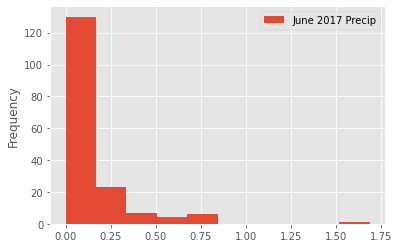

In [32]:
# Create histogram for June 2017.
juneprec17_df.plot.hist()

<AxesSubplot:ylabel='Frequency'>

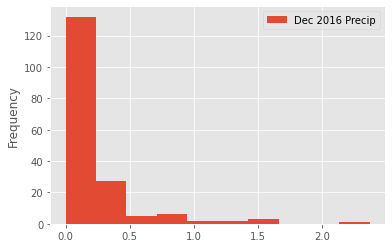

In [33]:
# Create histogram for December 2016.
decprec16_df.plot.hist()

In [34]:
# Create DataFrame for all records in June 2017 that show precipitation greater than 0.1 inch.
juneprec2017_df =pd.DataFrame(juneprec17_df[juneprec17_df['June 2017 Precip'] > 0.1])

juneprec2017_df

,date,June 2017 Precip
32,2017-06-03,0.20
33,2017-06-04,0.15
39,2017-06-10,0.21
40,2017-06-11,0.24
41,2017-06-12,0.19
42,2017-06-13,0.36
43,2017-06-14,0.27
44,2017-06-15,0.17
46,2017-06-17,0.35
47,2017-06-18,0.25


In [35]:
# Determine the average of the station TEMPS by day - DECEMBER - all years.
dec_dayavg = dec_df.groupby('date')['December Temps'].mean()

dec_dayavg

date
2010-12-01    73.125000
2010-12-02    72.500000
2010-12-03    71.875000
2010-12-04    74.857143
2010-12-05    71.285714
2010-12-06    65.111111
2010-12-07    66.222222
2010-12-08    65.666667
2010-12-09    74.444444
2010-12-10    65.222222
2010-12-11    69.250000
2010-12-12    69.714286
2010-12-13    70.222222
2010-12-14    71.777778
2010-12-15    71.777778
2010-12-16    66.444444
2010-12-17    66.125000
2010-12-18    69.000000
2010-12-19    69.285714
2010-12-20    71.166667
2010-12-21    70.500000
2010-12-22    69.000000
2010-12-23    69.714286
2010-12-24    69.285714
2010-12-25    71.400000
2010-12-26    71.714286
2010-12-27    74.428571
2010-12-28    70.714286
2010-12-29    72.714286
2010-12-30    72.285714
2010-12-31    74.000000
2011-12-01    68.750000
2011-12-02    69.125000
2011-12-03    72.428571
2011-12-04    72.285714
2011-12-05    71.375000
2011-12-06    71.125000
2011-12-07    69.750000
2011-12-08    70.750000
2011-12-09    69.142857
2011-12-10    72.142857
2011-12-11 

In [36]:
# Determine the average of the station TEMPS by day - JUNE - all years.
june_dayavg = june_df.groupby('date')['June Temps'].mean()

june_dayavg

date
2010-06-01    73.555556
2010-06-02    74.555556
2010-06-03    74.444444
2010-06-04    72.888889
2010-06-05    76.000000
2010-06-06    76.000000
2010-06-07    74.250000
2010-06-08    75.625000
2010-06-09    75.888889
2010-06-10    75.750000
2010-06-11    78.000000
2010-06-12    75.000000
2010-06-13    77.000000
2010-06-14    73.428571
2010-06-15    74.250000
2010-06-16    74.750000
2010-06-17    75.111111
2010-06-18    72.000000
2010-06-19    76.250000
2010-06-20    77.428571
2010-06-21    75.714286
2010-06-22    74.888889
2010-06-23    75.111111
2010-06-24    75.000000
2010-06-25    73.111111
2010-06-26    73.666667
2010-06-27    76.500000
2010-06-28    74.444444
2010-06-29    74.111111
2010-06-30    75.000000
2011-06-01    73.875000
2011-06-02    75.000000
2011-06-03    69.625000
2011-06-04    69.500000
2011-06-05    74.000000
2011-06-06    73.857143
2011-06-07    72.285714
2011-06-08    74.444444
2011-06-09    75.000000
2011-06-10    75.285714
2011-06-11    75.500000
2011-06-12 

In [37]:
june_dayavg.count()

240

In [38]:
# Determine the average of the station PRECIPITATION by day - DECEMBER - all years.
decprec_dayavg = decprec_df.groupby('date')['December Precipitation'].mean()
decprec_dayavg

date
2010-12-01    0.565000
2010-12-02    0.115714
2010-12-03    0.405000
2010-12-04    0.027143
2010-12-05    0.000000
2010-12-06    0.002222
2010-12-07    0.002222
2010-12-08    0.053333
2010-12-09    0.190000
2010-12-10    1.910000
2010-12-11    0.715000
2010-12-12    0.145714
2010-12-13    0.192500
2010-12-14    0.022222
2010-12-15    0.011111
2010-12-16    0.005556
2010-12-17    0.000000
2010-12-18    0.000000
2010-12-19    2.684286
2010-12-20    3.931667
2010-12-21    0.645000
2010-12-22    0.123333
2010-12-23    0.054286
2010-12-24    0.034286
2010-12-25    1.224000
2010-12-26    1.642000
2010-12-27    0.141429
2010-12-28    0.642857
2010-12-29    0.054286
2010-12-30    0.114286
2010-12-31    0.024286
2011-12-01    0.063750
2011-12-02    0.205000
2011-12-03    0.035714
2011-12-04    0.008571
2011-12-05    0.028750
2011-12-06    0.016250
2011-12-07    0.057500
2011-12-08    0.082500
2011-12-09    0.087143
2011-12-10    0.145000
2011-12-11    0.696667
2011-12-12    0.543333
2011-1

In [39]:
# Determine the average of the station PRECIPITATION by day - JUNE - all years.
juneprec_dayavg = juneprec_df.groupby('date')['June Precipitation'].mean()
                                       
juneprec_dayavg                                        

date
2010-06-01    0.018750
2010-06-02    0.007778
2010-06-03    0.026667
2010-06-04    0.001111
2010-06-05    0.011250
2010-06-06    0.016250
2010-06-07    0.090000
2010-06-08    0.035000
2010-06-09    0.000000
2010-06-10    0.002500
2010-06-11    0.000000
2010-06-12    0.004286
2010-06-13    0.010000
2010-06-14    0.030000
2010-06-15    0.020000
2010-06-16    0.001429
2010-06-17    0.010000
2010-06-18    0.101250
2010-06-19    0.081429
2010-06-20    0.007143
2010-06-21    0.001429
2010-06-22    0.002857
2010-06-23    0.018889
2010-06-24    0.076667
2010-06-25    0.172222
2010-06-26    0.271667
2010-06-27    0.108000
2010-06-28    0.056250
2010-06-29    0.027778
2010-06-30    0.093333
2011-06-01    0.184286
2011-06-02    0.096250
2011-06-03    0.887500
2011-06-04    1.666667
2011-06-05    1.441667
2011-06-06    0.021429
2011-06-07    0.047143
2011-06-08    0.081250
2011-06-09    0.023333
2011-06-10    0.025714
2011-06-11    0.035000
2011-06-12    0.341667
2011-06-13    0.087500
2011-0

In [41]:
juneprec_dayavg.count()

240

In [42]:
# Combine the daily precipitation and temps for June into a single DataFrame.

# Create 2 series by passing lists.
june_precip = pd.Series(juneprec_dayavg)
june_temps = pd.Series(june_dayavg)

# Create a dictionary by passing Series objects as values.
june_frame = {'Precipitation': june_precip, 'Temps': june_temps}

# Create a DataFrame by passing the dictionary.
june_df = pd.DataFrame(june_frame)

june_df

,Precipitation,Temps
date,,
2010-06-01,0.018750,73.555556
2010-06-02,0.007778,74.555556
2010-06-03,0.026667,74.444444
2010-06-04,0.001111,72.888889
2010-06-05,0.011250,76.000000
2010-06-06,0.016250,76.000000
2010-06-07,0.090000,74.250000
2010-06-08,0.035000,75.625000
2010-06-09,0.000000,75.888889


In [43]:
# Total number of JUNE days that have data.
len(june_df)

240

In [44]:
# Determine how many days in JUNE there was actual rain averaging among the stations above 0.1 precipitation.
actual_rain_june = june_df[june_df['Precipitation']> 0.1]

len(actual_rain_june)

98

In [45]:
# Combine the daily precipitation and temps for December into a single DataFrame.

# Create 2 series by passing lists.
dec_precip = pd.Series(decprec_dayavg)
dec_temps = pd.Series(dec_dayavg)

# Create a dictionary by passing Series objects as values.
dec_frame = {'Precipitation': dec_precip, 'Temps': dec_temps}

# Create a DataFrame by passing the dictionary.
dec_df = pd.DataFrame(dec_frame)

dec_df

,Precipitation,Temps
date,,
2010-12-01,0.565000,73.125000
2010-12-02,0.115714,72.500000
2010-12-03,0.405000,71.875000
2010-12-04,0.027143,74.857143
2010-12-05,0.000000,71.285714
2010-12-06,0.002222,65.111111
2010-12-07,0.002222,66.222222
2010-12-08,0.053333,65.666667
2010-12-09,0.190000,74.444444


In [46]:
# Total number of DECEMBER days that have data.
len(dec_df)

217

In [47]:
# Determine how many days in DECEMBER there was actual rain averaging among the stations above 0.1 precipitation.
actual_rain_dec = dec_df[dec_df['Precipitation']> 0.1]

len(actual_rain_dec)

99

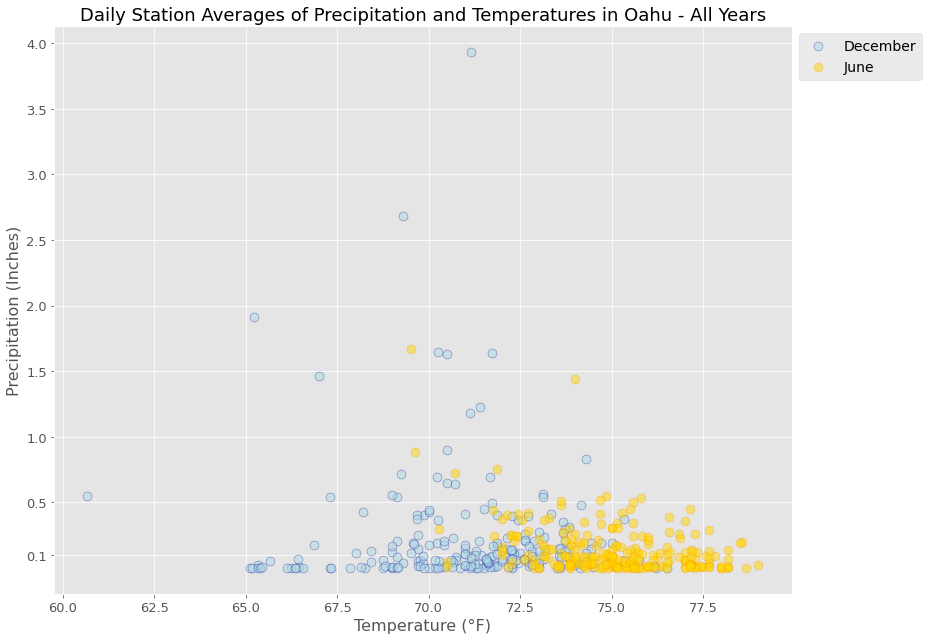

In [49]:
# Create a scatterplot to evaluate the temps and precipitation of June and December - All Years.
plt.figure(figsize=(13,9))
plt.xlabel("Temperature (°F)", fontsize=16)
plt.ylabel("Precipitation (Inches)", fontsize=16)
plt.title ("Daily Station Averages of Precipitation and Temperatures in Oahu - All Years", fontsize=18)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.yticks([0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])


plt.scatter(x = dec_df.Temps, 
            y = dec_df.Precipitation,
            s = 80,
            c = 'lightblue',
            edgecolors = 'darkblue',
            alpha = 0.5,
            label = "December")

plt.scatter(x = june_df.Temps,
            y = june_df.Precipitation,
            s = 80,
            c = 'gold',
            edgecolors = 'darkorange',
            alpha = 0.5,
            label = "June"
            )

plt.legend(fontsize = 14,loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()

In [50]:
# Isolate just the DECEMBER data from 2016.
dec2016_df = dec_df.query("date >= '2016-12-01'\
                          and date <= '2016-12-31'")

dec2016_df

,Precipitation,Temps
date,,
2016-12-01,0.295000,73.714286
2016-12-02,0.393333,72.285714
2016-12-03,0.451667,71.500000
2016-12-04,0.133333,73.000000
2016-12-05,0.540000,69.142857
2016-12-06,0.008000,69.166667
2016-12-07,0.076000,71.142857
2016-12-08,0.065714,72.000000
2016-12-09,0.370000,69.666667


In [51]:
# Isolate just the JUNE data from 2017.
june2017_df = june_df.query("date >= '2017-06-01'\
                          and date <= '2017-06-30'")

june2017_df

,Precipitation,Temps
date,,
2017-06-01,0.006667,78.166667
2017-06-02,0.068000,78.166667
2017-06-03,0.122000,77.333333
2017-06-04,0.191667,78.500000
2017-06-05,0.013333,77.428571
2017-06-06,0.000000,77.285714
2017-06-07,0.001667,78.142857
2017-06-08,0.005000,77.142857
2017-06-09,0.008000,78.166667


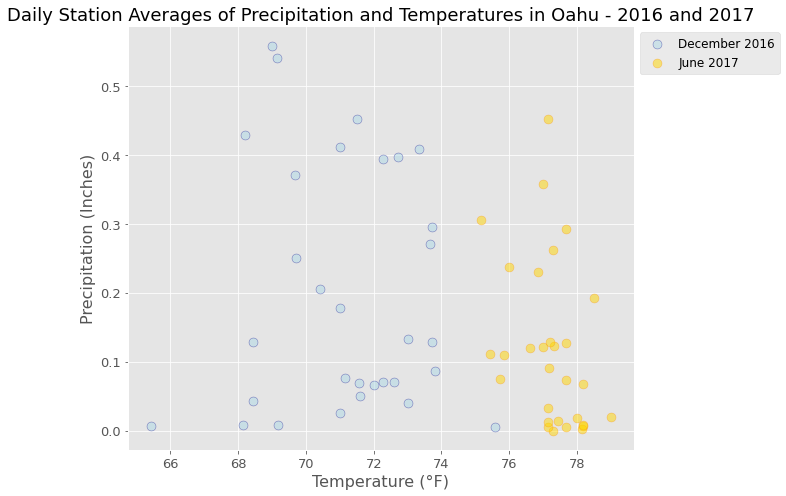

In [53]:
# Create a scatterplot to evaluate the temps and precipitation of most recent - December 2016 and June 2017.
plt.figure(figsize=(10,7))
plt.xlabel("Temperature (°F)", fontsize=16)
plt.ylabel("Precipitation (Inches)", fontsize=16)
plt.title ("Daily Station Averages of Precipitation and Temperatures in Oahu - 2016 and 2017", fontsize=18)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.scatter(x = dec2016_df.Temps, 
            y = dec2016_df.Precipitation,
            s = 80,
            c = 'lightblue',
            edgecolors = 'darkblue',
            alpha = 0.5,
            label = "December 2016")

plt.scatter(x = june2017_df.Temps,
            y = june2017_df.Precipitation,
            s = 80,
            c = 'gold',
            edgecolors = 'darkorange',
            alpha = 0.5,
            label = "June 2017")

plt.legend(loc='upper left', bbox_to_anchor=(1,1),fontsize = 12)
plt.tight_layout()
